# Baseline Model

This notebook implements a baseline linear regression model for predicting sales using weather and event data.

## 1. Import Libraries and load dataset

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("/workspaces/bakery_sales_prediction/merged_sales_weather_kiwo_data.csv", parse_dates=["Datum"])
df.head()

,id,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,DayOfWeek,...,Month,Year,Week,Day,TemperatureCategory,CloudCategory,WindCategory,IsHoliday_lib,HolidayName,Season
0,NaN,2012-01-01,NaN,NaN,8.0,9.8250,14.0,58.0,0,6,...,1,2012,52,1,cold,cloudy,moderate,1,Neujahr,Winter
1,NaN,2012-01-02,NaN,NaN,7.0,7.4375,12.0,NaN,0,0,...,1,2012,1,2,cold,cloudy,moderate,0,No Holiday,Winter
2,NaN,2012-01-03,NaN,NaN,8.0,5.5375,18.0,63.0,0,1,...,1,2012,1,3,cold,cloudy,moderate,0,No Holiday,Winter
3,NaN,2012-01-04,NaN,NaN,4.0,5.6875,19.0,80.0,0,2,...,1,2012,1,4,cold,partly cloudy,moderate,0,No Holiday,Winter
4,NaN,2012-01-05,NaN,NaN,6.0,5.3000,23.0,80.0,0,3,...,1,2012,1,5,cold,cloudy,strong,0,No Holiday,Winter


## 2. Select and Clean Features
We'll select features likely to influence sales and drop rows with missing values.

In [3]:
data = df[["Umsatz", "Temperatur", "Bewoelkung", "Windgeschwindigkeit", "Weekend", "KielerWoche", "IsHoliday_lib"]].dropna()
X = data[["Temperatur", "Bewoelkung", "Windgeschwindigkeit", "Weekend", "KielerWoche", "IsHoliday_lib"]]
y = data["Umsatz"]


## 3. Split Data
We split the data into training and test sets (80/20).

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Train Baseline Model
We use a simple linear regression model as our baseline.

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 5. Predict and Evaluate
We predict on the test set and evaluate using MSE and R².

In [6]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.3f}")

Mean Squared Error: 17950.51
R² Score: 0.064


# 6. Actual vs predicted sales


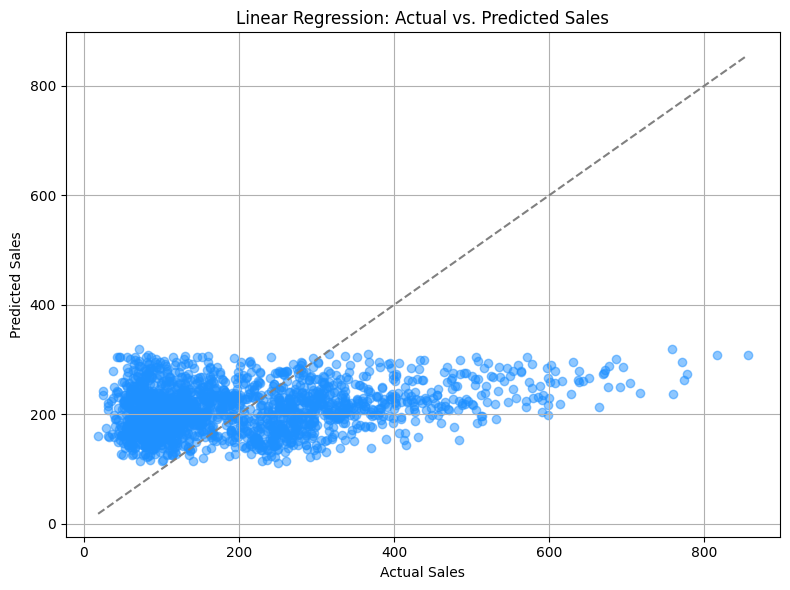

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs. Predicted Sales")
plt.grid(True)
plt.tight_layout()
plt.show()